# Introduction to neural network calssification with TensorFlow 

In this notebook we're going to learn how to write neural networks for classification 

A few types of classification: 
* Binary classification 
* Multiclass classification 
* Multilabel classification 

## Create a data to view and fit

In [ ]:
from sklearn.datasets import make_circles 
import tensorflow as tf
# Make a 1000 expamples 
n_samples = 1000 

# Create circles 
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state = 42)

In [ ]:
# Check out features 
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [ ]:
# Check out the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
# We will visualize the data to understand it 

import pandas as pd
circles = pd.DataFrame ({"X0": X[:,0], "X1" : X[:,1], "label" : y})

In [ ]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


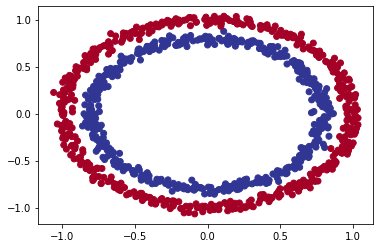

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Check the shapes of the features and labels 
X.shape, y.shape 

((1000, 2), (1000,))

In [ ]:
# Check the number of sampes we're working with 
len(X), len(y)

(1000, 1000)

## Steps in modelling 

The steps in modelling with TensorFlow are typically: 

1. Create or import a model 
2. Complile the model 
3. Fit the model 
4. Evaluate the model 
5. Tweak 
6. Evaluate...

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

#1. Create a model(specified to needs in binary classification) using Sequential Api

model_1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the model 

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#3. Fit the model 
model_1.fit(X, y, epochs=50)

Epoch 1/50
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/50
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830
Epoch 6/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4990
Epoch 7/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4880
Epoch 8/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4950
Epoch 9/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4840
Epoch 10/50
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4820
Epoch 11/50
32/32 [

Since we're working on a binary classification problem and our model is getting around fifty percent accuracy it means the algorithm is guessing. 
So we will add an extra layer  

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create a model, this time with 2 layers 
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

#3. Fit the model 
model_2.fit(X, y, epochs=100, verbose=0)

In [ ]:
#4. Evaluate the model 
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model 

Let's look into our bag of trick to see how we can improve our model. 

1. Create a model - we might to add more layers or increase the number of hiden units.
2. Compiling a model - here we might want to choose a diferent optimization function.
3. Fitting a model - fight our model for more epochs, leave it training for longer 

In [ ]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model () 
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons 
                               tf.keras.layers.Dense(10), # add another layer with 10 neurons 
                               tf.keras.layers.Dense(1)
])

#2. Compile the model 
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#3. Fit the model 
model_3.fit(X, y, epochs=100, verbose=0 )

In [ ]:
model_3.predict(X)

array([[0.48793244],
       [0.55887616],
       [0.56292856],
       [0.5705068 ],
       [0.44141158],
       [0.5738823 ],
       [0.5576486 ],
       [0.48246637],
       [0.47755855],
       [0.5750227 ],
       [0.5148492 ],
       [0.53087693],
       [0.5643773 ],
       [0.45787305],
       [0.45052725],
       [0.46129915],
       [0.54055846],
       [0.46380937],
       [0.54798055],
       [0.50375706],
       [0.50630444],
       [0.58775467],
       [0.45902476],
       [0.4912331 ],
       [0.5832161 ],
       [0.57042587],
       [0.5523935 ],
       [0.4631735 ],
       [0.4577342 ],
       [0.4544098 ],
       [0.47872254],
       [0.57856053],
       [0.55546165],
       [0.46339142],
       [0.45849174],
       [0.589867  ],
       [0.57247376],
       [0.529744  ],
       [0.45870548],
       [0.51092875],
       [0.49994174],
       [0.5463086 ],
       [0.5109905 ],
       [0.45797244],
       [0.52232754],
       [0.53888047],
       [0.44872287],
       [0.544

We will create a way to visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will: 
* Take in a trained  model, features(X) and labels (y)
* Create a meshgrid of the different X values 
* Make predictions across the meshgrid 
* Plot the predictions as well as line between zones (where each unique class falls)   

In [ ]:
import numpy as np 

def plot_decision_boundary (model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the  axis boundaries of the plot and create a meshgrid 
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X vaue (we're going to make predictios on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] #Stack 2D arrays together 

  # Make predictions 
  y_pred = model.predict(x_in)

  # Check for multi-class 
  if len(y_pred[0]) > 1:
    print("doing multiclass clasification")
    # We have to reshape our prediction to get them ready for plotting 
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
    #Plot the decision boundary 
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(),yy.max())


doing binary classification


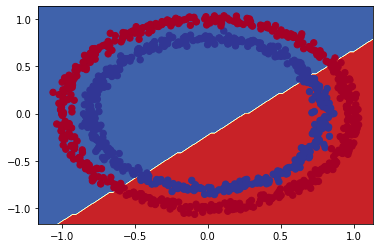

In [ ]:
# Check the predictions our model is making 
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

## Missing piece: non-linearity 

We can use an activation function that is non-linear on the model to improve the results. 


In [ ]:
# Set random seed 
tf.random.set_seed(42)

#1. Create a model with a non-linear activation 
model_4 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#2. Compile the model 
model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#3. Fit the model 
history = model_4.fit(X,y, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.5870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1668 - accuracy: 0.5880
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1639 - accuracy: 0.5700
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.6390
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.6950
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.7210
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1318 - accuracy: 0.7950
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1187 - accuracy: 0.8280
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.8980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9430
Epoch 11/100
32/32 [=

doing binary classification


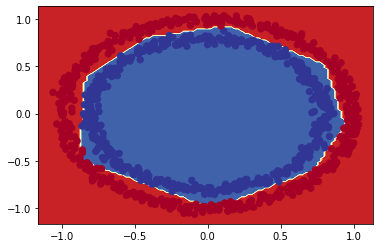

In [ ]:
# Check the predictions our model is making 
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

**Note:** The combination of linear and non-linear funcitons is one o the fundamentals of neural networks. 


In [ ]:
# Create a toy tensor (similar to the data we pass into our models)

A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

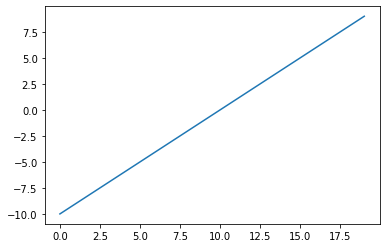

In [ ]:
# Visualize our toy tensor 
plt.plot(A);

## Evaluaing and improving our classification 
So far we've been training and testing on the same datase so we will divide the dataset into train, test and vallidate. 

In [ ]:
# Split the data into train and test sets 
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Lets recreate a model to fit on the training data and evaluate on the train test 

# Create the seed 
tf.random.set_seed(42)

#Create the model (same as last model)

#1. Create a model with a non-linear activation 
model_5 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#2. Compile the model 
model_5.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

#3. Fit the model 
history = model_5.fit(X_train,y_train, epochs=100)


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.1709 - accuracy: 0.5838
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1682 - accuracy: 0.5763
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1664 - accuracy: 0.5863
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.5875
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.6500
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.6263
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1543 - accuracy: 0.7200
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.7425
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1399 - accuracy: 0.7400
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.7525
Epoch 11/100
25/25 [=

In [ ]:
# Evaluate the model on the test dataset 
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9950


[0.006081768777221441, 0.9950000047683716]

doing binary classification
doing binary classification


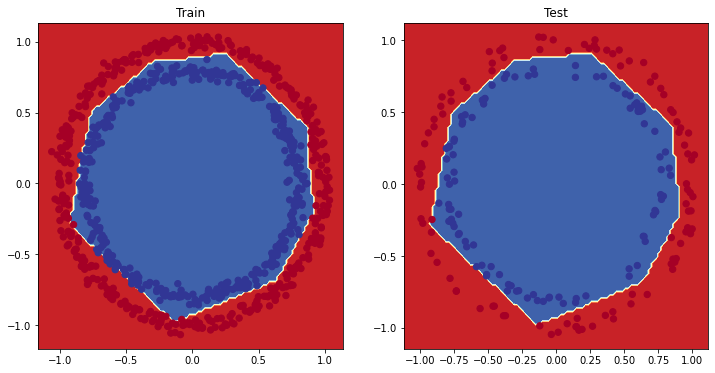

In [ ]:
# Plot the decision boundaries for the training and test sets 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X=X_test, y=y_test)

## Plot the loss (or training) curves 

In [ ]:
# Convert the history object into a dataframe 

pd.DataFrame(history.history)

,loss,accuracy
0,0.170861,0.58375
1,0.168160,0.57625
2,0.166422,0.58625
3,0.164938,0.58750
4,0.162398,0.65000
...,...,...
95,0.009824,0.98625
96,0.010096,0.98625
97,0.009432,0.99125
98,0.009062,0.99500


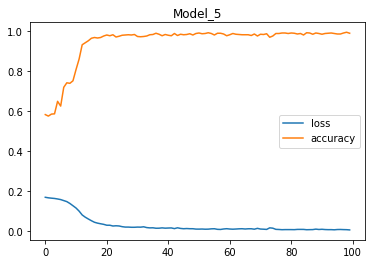

In [ ]:
# Plot the loss curves 
pd.DataFrame(history.history).plot()
plt.title("Model_5");

🔨 **Note:**  For many problems, the loss function going down means the model is improving (is making the predictions better) 


## Finding the best learning rate 

To find the ideal learning rate we're going to use the following steps: 
* A earning rate **calback** - you can think of a callback as an extra pice of functionality, you can add to your *while* it's training.
* Another model 
* A modified loss curve 

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create  a mode similar to the one before 

model_6 = tf.keras.Sequential([
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(4, activation = "relu"),
                               tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model 
model_6.compile(loss = "binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

# Create a learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 **(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_6 = model_6.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks = [lr_scheduler]
)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

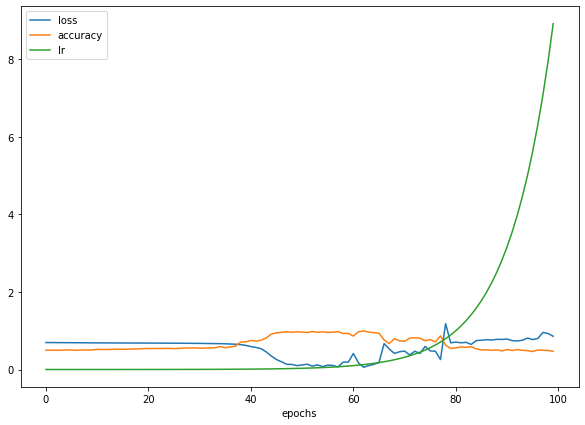

In [ ]:
# Checkout the history 
pd.DataFrame(history_6.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

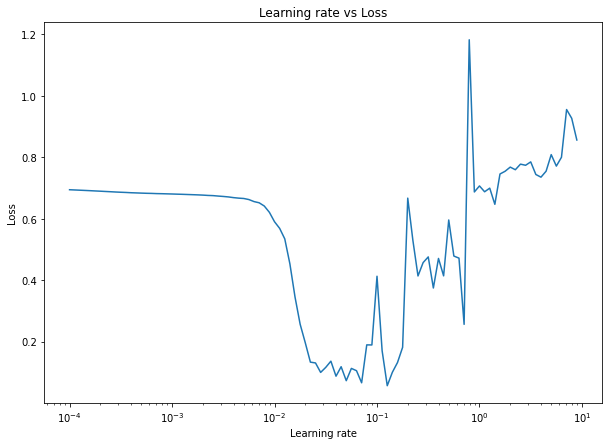

In [ ]:
# Plot the learning rate v.s the loss 
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")


In [ ]:
# Example of other typical learning rate values : 
10 ** 0, 10 ** -1, 10 **-2

(1, 0.1, 0.01)

In [ ]:
# Lets recreate a model with the learning rate we've found with the previous analisis

# Create the seed 
tf.random.set_seed(42)

#Create the model

#1. Create a model with a non-linear activation 
model_7 = tf.keras.Sequential([
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                                tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

#2. Compile the model 
model_7.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

#3. Fit the model 
history = model_7.fit(X_train,y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.1706 - accuracy: 0.5587
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1652 - accuracy: 0.6087
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1595 - accuracy: 0.6625
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.7713
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.1228 - accuracy: 0.8350
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.8675
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9112
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0625 - accuracy: 0.9438
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9513
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9575
Epoch 11/25
25/25 [===========

## More classification methods 
Alongside visualizing our models results as much as possible, thera are handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy 
* Precision 
* Recall 
* F1-score 
* Confusion matrix 
* Classification report (from scikit-learn)  

In [ ]:
# Check the accuracy of our model 
loss, accuracy = model_7.evaluate (X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")


7/7 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9650
Model loss on the test set: 0.021894803270697594
Model accuracy on the test set: 96.50%


We will make a confusion matrix that shows the correct and incorrect predictions 

In [ ]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_7.predict(X_test)

# Create a confusion matrix 
confusion_matrix(y_test, y_preds.round())

array([[94,  7],
       [ 0, 99]])

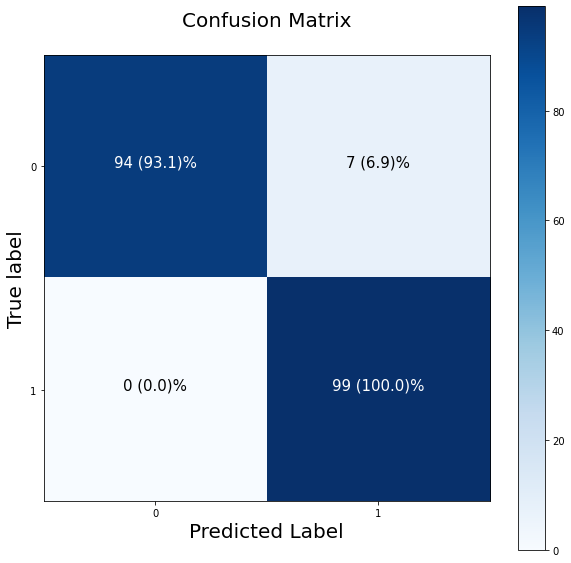

In [ ]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matrix 

import itertools 

figsize = (10,10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalize our confusion matrix 
n_classes = cm.shape[0]


# Let's prettify it 
fig, ax = plt.subplots(figsize=figsize)

# Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Creae classes 
classes= False 

if classes:
  labels = classes
else:
  labels=np.arange(cm.shape[0])

# Label the axes 
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom 
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

#Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2.

#Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f})%",
           horizontalalignment="center",
           color="black" if cm[i, j] < threshold else "white", 
           size=15)


## Working with a larger example (multiclass classification)
When we work with more than two classes it's known as a **multi-class classification** 
* This means if you have more than 2 different classes, it's multi-class classification 
To practice multiclass classification, we're going to bui a neural network to classify images of different items for clothing.  


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 

# The data has already been sorted into training and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
# Show the first training example 
print(f"Training example:\n{train_data[0]}")
print(f"Training label:\n {train_labels[0]}")

Training example:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [3]:
# Check the shape of a single example 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

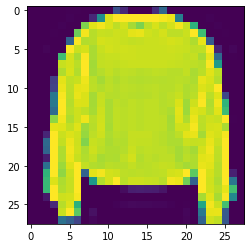

In [4]:
# Plot a single sample 
import matplotlib.pyplot as plt 
plt.imshow(train_data[7])


In [5]:
# Create a small list so we can index onto our training labels so the're easy to understand
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",	"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]	

In [6]:
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

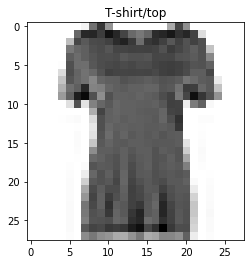

In [7]:
# Plot an example image and it's label 
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

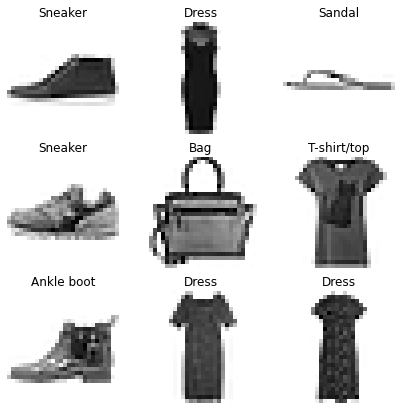

In [8]:
# Plot multiple randon images of fashin MNIST 
import random 
plt.figure(figsize=(7, 7))
for i in range(9):
  ax = plt.subplot(3, 3, i+1)
  rand_index =  random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model 
For our multi-class classification model, we can use a similar architecture to our binary clasifiers, however, we're going to have to tweak a few things: 
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function =tf.keras.losses.CategoricalCrossentropy () this is if your labels are one-hot encoded
* Loss function=tf.keras.losses.SparseCategoricalCrossentropy if the labels are numbers 
* Outpot layer actiation = Softmax (not simgoid) 


In [16]:
# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_8 = tf.keras.Sequential ([
                                tf.keras.layers.Flatten(input_shape= (28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model 
model_8.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 
non_norm_history= model_8.fit(train_data,
                              train_labels,
                              epochs=10,
                              validation_data=(test_data, test_labels))



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [10]:
# Check the model summary 
model_8.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Check the min and max values of the training data 
train_data.min(), train_data.max()

(0, 255)

Neuraal networks prefer to work with scaled (or normalized) data, this means work with numbers between 0 and 1 

In [12]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum 
train_data_norm = train_data /255.0 
test_data_norm = test_data /255.0

# Check the min and max values of the scaled training data 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [14]:
# Now we will work with a model that is normalized to find patterns in it 

# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_9 = tf.keras.Sequential ([
                                tf.keras.layers.Flatten(input_shape= (28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model 
model_9.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 
norm_history= model_9.fit(train_data_norm,
                              train_labels,
                              epochs=15,
                              validation_data=(test_data_norm, test_labels))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

⚡**Note:** The neural networks algorithm works better with normalized data 

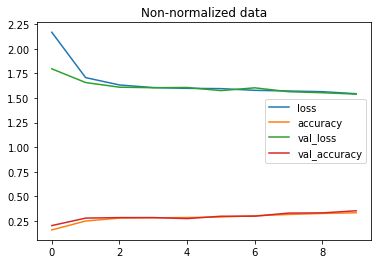

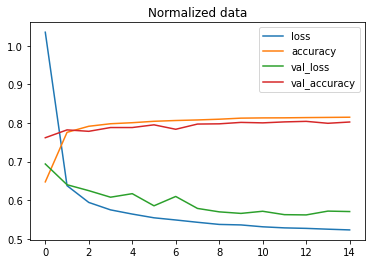

In [17]:
import pandas as pd 
# Plot non-normalized data loss curves 
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#Plotnormalized data loss curves 
pd.DataFrame(norm_history.history).plot(title="Normalized data")

⚡**Note:** The same model with sligthly different data can produce different results. So when comparing models it's important to compare in the same architecture and different data or same data but different architecture

## Findind the ideal learning rate 

In [22]:
# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_10 = tf.keras.Sequential ([
                                tf.keras.layers.Flatten(input_shape= (28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model 
model_10.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Create the learninr rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:  1e-3 * 10 ** (epoch/20) )

# Fit the model 
find_lr_history = model_10.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks = [lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

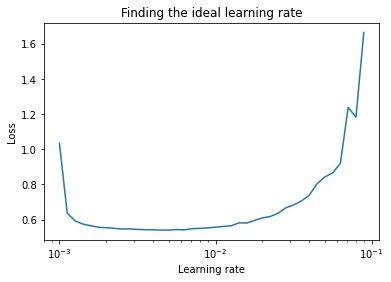

In [24]:
# Plot the learning rate decay curve 

import numpy as np 
import matplotlib.pyplot as plt 

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx (lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
# We've foun the apperantly best learning rate that shows the graph is 10**-3

In [25]:
# Let's refit a model with the ideal learning rate of 0.001

# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_11 = tf.keras.Sequential ([
                                tf.keras.layers.Flatten(input_shape= (28,28)),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(4, activation="relu"),
                                tf.keras.layers.Dense(10, activation="softmax")                                
])

# Compile the model 
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 
model_11_history = model_11.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels)
                              )

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluation our multi-class classification model 
To evaluate our multi-class classification model we could: 
* Evaluate it's preformance using other classification metrics (Such as a confusion matrix).
* Asses some of it's predictions (trhough visualizations)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in application 

Let's go through the first two: 


In [38]:
# Note: the confusion matrix code we're about to write is a remix of scikit-learn's plot confusion matrix 

import itertools 
from sklearn.metrics import confusion_matrix



def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size =15):
  
  # Create the confusion matrix 
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #Normalize our confusion matrix 
  n_classes = cm.shape[0]


  # Let's prettify it 
  fig, ax = plt.subplots(figsize=figsize)

  # Create a matrix plot 
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels=np.arange(cm.shape[0])

  # Label the axes 
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom 
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #Adjust label size 
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  #Set threshold for different colors 
  threshold = (cm.max() + cm.min()) / 2.

  #Plot the text on each cell 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i, j]*100:.1f})%",
            horizontalalignment="center",
            color="black" if cm[i, j] < threshold else "white", 
            size=text_size)

In [27]:
# Make some predictions with our model 
y_probs = model_11.predict(test_data) # Provs is a short for prediction probabilities 


In [28]:
# View the first 5 predictions 
y_probs[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data, you'll want to make predictions on normalized data)

In [30]:
y_probs = model_11.predict(test_data_norm) # Provs is a short for prediction probabilities 


In [31]:
# View the first prediction 
y_probs[0]

array([1.7880183e-10, 8.5933510e-11, 1.4691766e-05, 5.1316181e-07,
       1.8115234e-05, 2.9706034e-01, 4.2002629e-08, 4.3864589e-02,
       4.0301597e-03, 6.5501159e-01], dtype=float32)

In [32]:
# Convert prediction probabilities into integers 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels 
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[833,  13,  11,  54,   3,   2,  73,   0,  11,   0],
       [  6, 950,   1,  26,   5,   1,  11,   0,   0,   0],
       [ 42,   1, 593,   8, 164,   1, 178,   0,  13,   0],
       [ 74,  27,  10, 787,  35,   1,  56,   2,   8,   0],
       [  2,   1,  83,  29, 728,   0, 150,   0,   7,   0],
       [  0,   1,   0,   0,   0, 941,   0,  34,   3,  21],
       [217,   9, 117,  34,  98,   3, 505,   0,  17,   0],
       [  0,   0,   0,   0,   0,  70,   0, 905,   0,  25],
       [ 16,   1,  32,  19,   5,   9,   8,   5, 905,   0],
       [  0,   0,   0,   0,   1,  36,   0,  48,   5, 910]])

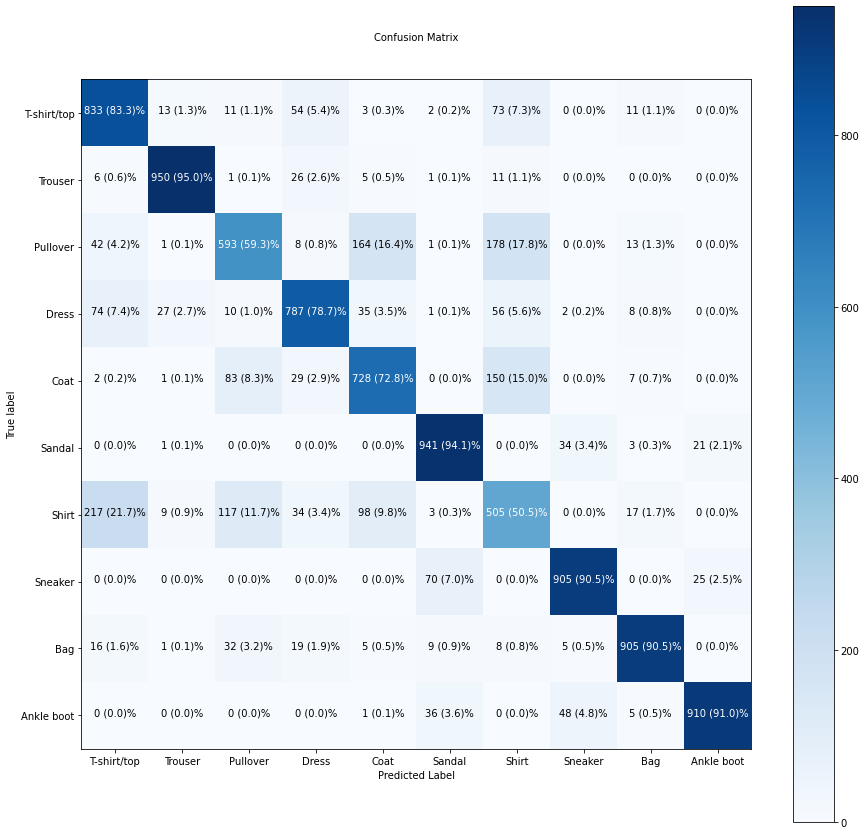

In [40]:
# Make a prettier confusion matrix 
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15,15),
                      text_size=10)

⚡ **Note:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of the model 


In [103]:
# Create a function that do the following:
# *Plot random image 
# *Make a prediction on said image 
# *Label the plot with the truth label & the predicted label 

import random 

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """
  # Set up random integer 
  i=random.randint(0, len(images))

  # Create predictions and targets 
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image 
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Changethe color of the titles depending if the prediction is right or wrong 
  if pred_label == true_label:
    color="green"
  else:
    color="red"

  #Add xlabel informati2on (prediction/true label)
  plt.xlabel("Pred: {} (True: {}) ".format(pred_label,true_label), color=color)

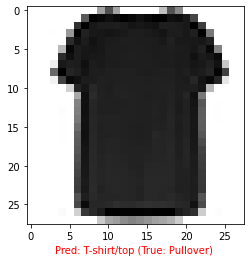

In [112]:
# Check out a random image as well as it's prediction 
plot_random_image(model=model_11,
                  images=test_data_norm,
                  true_labels=test_labels,
                  classes = class_names)


## What patterns is our model learning 


In [113]:
# Find the layers of our most recent model 
model_11.layers

In [114]:
model_11.layers[1]

In [115]:
# Get the patterns of a layer in our network 
weights, biases = model_11.layers[1].get_weights()

# Shapes 
weights, weights.shape

(array([[ 1.5936174 , -0.76976854, -1.5807068 , -1.9991511 ],
        [ 0.45609504, -1.2976133 , -0.7302893 , -0.16224061],
        [ 1.348038  , -0.19881976, -1.9888442 , -1.2137522 ],
        ...,
        [-0.22335076,  0.59402996, -0.272626  ,  0.4604269 ],
        [-0.21883878,  1.1971763 ,  0.5428994 , -0.5791032 ],
        [ 0.37653425, -0.19791599,  0.02285609,  0.24255323]],
       dtype=float32), (784, 4))

In [117]:
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 4)                 3140      
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Now let's check the bias vector 


In [118]:
# Bias and biases shapes
biases, biases.shape

(array([ 0.3281791 , -0.01041772, -0.1584291 ,  1.2009073 ], dtype=float32),
 (4,))

Every neuron has a biasvector. Each of these is paired with a weight matrix. 
The bias vector get initialized as zeros (at leas in the case of a TensorFlow Dense layer) 
The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer. 

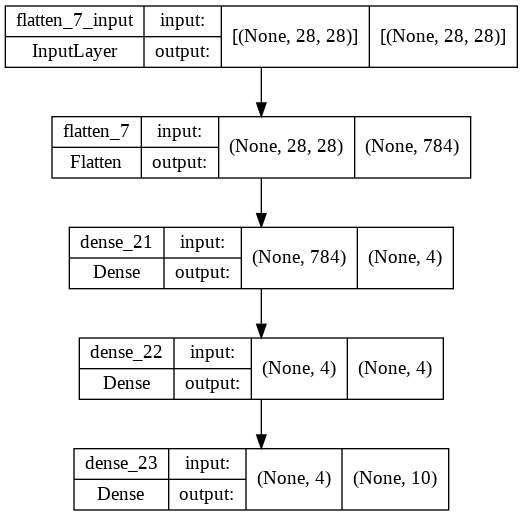

In [119]:
# Let's check out another way of viewing the deep learning models 
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer 
plot_model(model_11, show_shapes=True)